# Teoría

## ¿Qué es MyQSL?
MySQL es un sistema de gestión de bases de datos relacional.
## ¿Qué es una base de datos relacional?
Una base de datos relacional (RDB) es una forma de estructurar información en tablas, filas y columnas. Un RDB tiene la capacidad de establecer vínculos (o relaciones) entre información mediante la unión de tablas, lo que facilita la comprensión y la obtención de estadísticas sobre la relación entre varios datos.
## MySQL Connector
MySQL Connector/Python enables Python programs to access MySQL databases. MySQL Connector/Python includes support for converting parameter values back and forth between Python and MySQL data types.  
MySQL Python/Connector is an interface for connecting to a MySQL database server from 
Python. It implements the Python Database API and is built on top of the MySQL.

## connect()
The connect() constructor creates a connection to the MySQL server and returns an object of the
MySQLConnection class.

## Exception
Cuando una porción de código quiere indicar que ocurrió un error, se dice que debe lanzar una excepción. An exception is an event, which occurs during the execution of a program that disrupts the normal flow of the program's instructions. Raising an exception is a technique for interrupting the normal flow of execution in a program, signaling that some exceptional circumstance has arisen, and returning directly to an enclosing part of the program that was designated to react to that circumstance.

## raise
The raise keyword is used to raise an exception. You can define what kind of error to raise, and the text to print to the user.

## contraseña mal dada:
### MySQLInterfaceError: Access denied for user 'root'@'localhost' (using password: YES)
### ProgrammingError: 1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)
## el host no existe:
### MySQLInterfaceError: Unknown MySQL server host 'localhos' (11001)
### DatabaseError: 2005 (HY000): Unknown MySQL server host 'localhos' (11001)

In [36]:
import mysql.connector 
conn = mysql.connector.connect(
        host="localhost", # The MySQL hostname defines the location of your MySQL server and database
        user="root",
        passwd="Himenesumusic_13",
    )
cursor=conn.cursor()

cursor.execute("SHOW DATABASES")

print(type(conn))
print(type(cursor))

print(cursor)

# para ver mis bases de datos, puedo usar:
for x in cursor:
    print(x)
    
# o también puedo usar:
print(cursor.fetchall())



conn.close()

print(cursor) # aún funciona
for x in cursor:
    print(x) # Al cerrar la conexión, ya no me muestra las bases de datos

print(type(conn)) # aún funciona
print(type(cursor)) # aún funciona

# cursor=conn.cursor() # Al cerrar la conexión, aparece la excepción 'OperationalError: MySQL Connection not available.'

<class 'mysql.connector.connection_cext.CMySQLConnection'>
<class 'mysql.connector.cursor_cext.CMySQLCursor'>
CMySQLCursor: SHOW DATABASES
('information_schema',)
('mydb_thermo',)
('mysql',)
('performance_schema',)
('sys',)
('testdb',)
[]
CMySQLCursor: SHOW DATABASES
<class 'mysql.connector.connection_cext.CMySQLConnection'>
<class 'mysql.connector.cursor_cext.CMySQLCursor'>


## cursor()
The MySQLCursor class instantiates objects that can execute operations such as SQL statements. Cursor objects interact with the MySQL server using a MySQLConnection object. To create a cursor, use the cursor() method of a connection object: import mysql.  
All DDL (Data Definition Language) statements are executed using a handle structure known as a cursor.  
The MySQLCursor of mysql-connector-python (and similar libraries) is used to execute statements to communicate with the MySQL database. Using the methods of it you can execute SQL statements, fetch data from the result sets, call procedures.  
Itera sobre datos.  
Itera sobre registros.

## MySQL statement (sentencia de MySQL)
### Listado de sentencias básicas en SQL
SELECT se utiliza para consultar datos.  
DISTINCT sirve para eliminar los duplicados de las consultas de datos.  
WHERE se utiliza para incluir las condiciones de los datos que queremos consultar.  
AND y OR se utilizan para incluir 2 o más condiciones a una consulta.  
ORDER BY se utiliza para ordenar los resultados de una consulta.  
INSERT se utiliza para insertar datos.  
UPDATE se utiliza para actualizar o modificar datos ya existentes.  
DELETE se utiliza para borrar datos.


## ROLLBACK AND COMMIT
ROLLBACK: fuerza que se deshaga la transacción en caso de haber un problema o querer abandonarla. Cierra la transacción.  
COMMIT: confirma el conjunto de operaciones convirtiendo los datos en definitivos. Marca el éxito de la operación de bloque y cierra la transacción.  
COMMIT: Termina la transacción guardando en la base de datos todos los cambios realizados por la transacción. Cualquier tipo de bloqueo que se mantuviera durante la transacción queda liberado.  
ROLLBACK: Termina la transacción deshaciendo todos los cambios que hubiera realizado sobre la base de datos.

## Query (Consulta)
Una consulta o query de una base de datos, es un lenguaje estándar que permite traer datos de una o más tablas, para adicionar, actualizar o eliminar contenidos, de una manera rápida y poderosa. Hacer una consulta puede ser leer tablas, actualizar, insertar, eliminar, etc

## CRUD
Create "crear un registro"  
Read "leer uno o más registros"  
Update "actualizar un registro"  
Delete "eliminar"

## Como usar try-except cuando voy a abrir una conexión con MySQL

In [56]:
import mysql.connector 
from mysql.connector import errorcode

try:
    conn = mysql.connector.connect(
            host="localhot", # The MySQL hostname defines the location of your MySQL server and database
            user="root",
            passwd="Himenesumusic_13",
            database='testdb'
        )
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print(err)
    else:
        print(err)
        #print("Something is wrong with your user name or password")
    #elif err.errno == errorcode.ER_BAD_DB_ERROR:
         #print("Database does not exist")
    #else:
        #print(err) # caso en el cual, se imprimiría la excepción debido al host ingresado.
else:
    print("...")
    cursor=conn.cursor()
    cursor.execute("SHOW DATABASES")
    print(cursor.fetchall())
    conn.close()

...
[('information_schema',), ('mydb_thermo',), ('mysql',), ('performance_schema',), ('sys',), ('testdb',)]


## SyntaxError: positional argument follows keyword argument

In [67]:
def funcionX(*args,**kwargs):
    print("X")
    
funcionX("a",a="a",-1)

SyntaxError: positional argument follows keyword argument (3721860876.py, line 4)

## *list and **dict in a function call

### *t means "treat the elements of this iterable as positional arguments to this function call."

In [26]:
def foo(x, y):
    print(x, y)

t = (1, 2)
foo(*t)

# you can also do this in a list/tuple/set literals:

print([1, *(2, 3), 4])

1 2
[1, 2, 3, 4]


### **d means "treat the key-value pairs in the dictionary as additional named arguments to this function call."

In [51]:
def foo(x, y):
    print(x, y)

d = {'x':1, 'y':2}
# estas dos formas de entregarle argumentos a la funcion son equivalentes:
foo(y=2,x=1)
foo(**d)

print("Por otro lado:")
# you can also do this in a dictionary literals:
d = {'a': 1}
print({'b': 2, **d})
print({'1':1})

1 2
1 2
Por otro lado:
{'b': 2, 'a': 1}
{'1': 1}


## *list and **dict in a function signature

### *t means "take all additional positional arguments to this function and pack them into this parameter as a tuple."

In [43]:
def foo(*t):
    print(t)
foo(1,2)

(1, 2)


### **d means "take all additional named arguments to this function and insert them into this parameter as dictionary entries."

In [46]:
def foo(**d):
    print(d)

foo(x=1, y=2)

{'x': 1, 'y': 2}


### Note that parameters that appear after the starred parameter (the one marked *) are keyword-only:

In [60]:
def f(a, *, b): ...

f(1, b=2)  # fine
f(1, 2)    # error: b is keyword-only

TypeError: f() takes 1 positional argument but 2 were given

###  positional-only parameters, meaning parameters that cannot be used as keyword arguments. They appear before a / (a pun on * preceding keyword-only args).

In [55]:
def f(a, /, p, *, k): ...

f(  1,   2, k=3)  # fine
f(  1, p=2, k=3)  # fine
f(a=1, p=2, k=3)  # error: a is positional-only

TypeError: f() got some positional-only arguments passed as keyword arguments: 'a'

In [73]:
import re
i=re.findall(r'\d','pepito23juanita90')
print(i)

i=re.findall(r'\d+','pepito23juanita90')
print(i)

i=re.findall(r'\d+','tb_process77')
print(i)
print(i[0])

['2', '3', '9', '0']
['23', '90']
['77']
77


# DECORATORS

## (Context) Defining Functions Inside other Functions

In [91]:
def plus_one(number):
    def add_one(number):
        return number + 1
    return add_one(number)
plus_one(4)

5

## (Context) Passing Functions as Arguments to other Functions

In [92]:
def plus_one(number):
    return number + 1

def function_call(function):
    return function(5)

function_call(plus_one)

6

## (Context) Functions Returning other Functions

In [93]:
def hello_function():
    def say_hi():
        return "Hi"
    return say_hi
hello = hello_function() # hello = say_hi
print(hello)
hello() # llamo a la funcion say_hi()

<function hello_function.<locals>.say_hi at 0x000001CA861F9DA0>


'Hi'

## (Context) Nested Functions have access to the Enclosing Function's Variable Scope - Las funciones anidadas tienen acceso al ámbito variable de la función envolvente

In [4]:
def print_message(message):
    "Enclosing Function"
    def message_sender():
        "Nested Function"
        print(message)
    message_sender()

print_message("Some random message")

Some random message


## Creating Decorators - a simple decorator that will convert a sentence to uppercase
wrapper - n. envoltura.  
uppercase - n. mayúscula.

In [12]:
def uppercase_decorator(function): # function = say_hi
    def wrapper():
        func = function() # func = 'hello there'
        make_uppercase = func.upper() 
        return make_uppercase
    
    return wrapper

def say_hi():
    return 'hello there'

decorate = uppercase_decorator(say_hi) # decorate = wrapper
decorate() 

'HELLO THERE'

## However, Python provides a much easier way for us to apply decorators. We simply use the @ symbol before the function we'd like to decorate. Let's show that in practice below.

In [18]:
@uppercase_decorator
def say_hi():
    return 'hello there'

say_hi()

'HELLO THERE'

## Applying Multiple Decorators to a Single Function

In [22]:
def split_string(function):
    def wrapper():
        func = function()
        splitted_string = func.split()
        return splitted_string

    return wrapper

def say_hi():
    return 'hello there'

decorate = split_string(say_hi) # decorate = wrapper()
decorate() 

['hello', 'there']

In [25]:
@split_string
def say_hi():
    return 'hello there'
say_hi()

['hello', 'there']

In [31]:
@split_string
@uppercase_decorator 
def say_hi():
    return 'hello there'
say_hi()

['HELLO', 'THERE']

### Así se escribiría lo anterior en un solo bloque de código:

In [32]:
#observación: el orden de los decoradores importa. Si los intercambio de posición, hay error!
#The decorators will be applied in the order that we've called them. The application of decorators is from the bottom up.
def uppercase_decorator(function):
    def wrapper():
        func = function() # func = 'hello there'
        make_uppercase = func.upper()
        return make_uppercase
    
    return wrapper

def split_string(function):
    def wrapper():
        func = function()
        splitted_string = func.split()
        return splitted_string

    return wrapper

@split_string
@uppercase_decorator 
def say_hi():
    return 'hello there'
say_hi()

['HELLO', 'THERE']

## Accepting Arguments in Decorator Functions

In [34]:
# define a decorator that accepts arguments
def decorator_with_arguments(function):
    def wrapper_accepting_arguments(arg1, arg2):
        print("My arguments are: {0}, {1}".format(arg1,arg2))
        function(arg1, arg2)
    return wrapper_accepting_arguments
    

@decorator_with_arguments
def cities(city_one, city_two):
    print("Cities I love are {0} and {1}".format(city_one, city_two))

cities("Nairobi", "Accra")

My arguments are: Nairobi, Accra
Cities I love are Nairobi and Accra


## Defining General Purpose Decorators

In [49]:
def a_decorator_passing_arbitrary_arguments(function_to_decorate): # function_to_decorate = function_with_no_argument()
    def a_wrapper_accepting_arbitrary_arguments(*args,**kwargs):
        print('The positional arguments are', args)
        print('The keyword arguments are', kwargs)
        function_to_decorate(*args)
    return a_wrapper_accepting_arbitrary_arguments

@a_decorator_passing_arbitrary_arguments
def function_with_no_argument():
    print("No arguments here.")

function_with_no_argument()

The positional arguments are ()
The keyword arguments are {}
No arguments here.


In [50]:
def a_decorator_passing_arbitrary_arguments(function_to_decorate): # function_to_decorate = function_with_arguments(a, b, c)
    def a_wrapper_accepting_arbitrary_arguments(*args,**kwargs):
        print('The positional arguments are', args)
        print('The keyword arguments are', kwargs)
        function_to_decorate(*args)
    return a_wrapper_accepting_arbitrary_arguments

@a_decorator_passing_arbitrary_arguments
def function_with_arguments(a, b, c):
    print(a, b, c)

function_with_arguments(1,2,3)

The positional arguments are (1, 2, 3)
The keyword arguments are {}
1 2 3


In [52]:
# Keyword arguments are passed using keywords
def a_decorator_passing_arbitrary_arguments(function_to_decorate): # function_to_decorate = function_with_keyword_arguments()
    def a_wrapper_accepting_arbitrary_arguments(*args,**kwargs):
        print('The positional arguments are', args)
        print('The keyword arguments are', kwargs)
        function_to_decorate(*args)
    return a_wrapper_accepting_arbitrary_arguments

@a_decorator_passing_arbitrary_arguments
def function_with_keyword_arguments():
    print("This has shown keyword arguments")

function_with_keyword_arguments(first_name="Derrick", last_name="Mwiti")

The positional arguments are ()
The keyword arguments are {'first_name': 'Derrick', 'last_name': 'Mwiti'}
This has shown keyword arguments


In [310]:
# Keyword arguments are passed using keywords
def a_decorator_passing_arbitrary_arguments(function_to_decorate): # function_to_decorate = function_with_keyword_arguments()
    def a_wrapper_accepting_arbitrary_arguments(*args,**kwargs):
        print('The positional arguments are', args)
        print('The keyword arguments are', kwargs)
        function_to_decorate(*args)
    return a_wrapper_accepting_arbitrary_arguments

class clase:
    @a_decorator_passing_arbitrary_arguments
    def function_with_keyword_arguments():
        print("This has shown keyword arguments")

obj=clase()
obj.function_with_keyword_arguments(first_name="Derrick", last_name="Mwiti")

The positional arguments are (<__main__.clase object at 0x000001A0AA3F1190>,)
The keyword arguments are {'first_name': 'Derrick', 'last_name': 'Mwiti'}


TypeError: clase.function_with_keyword_arguments() takes 0 positional arguments but 1 was given

In [53]:
hola() #en Jupyter, no importa el orden del codigo en las celdas, como en cualquier otro entorno de programacion en Python.

Hola


In [46]:
def hola():
    print("Hola")

Hola


In [11]:
class prueba:
    def __init__(self):
        f()
        self.check()
    def check(self):
        print("Jorge")

def f():
    print("Hola")
    
p=prueba()

Hola
Jorge


In [307]:
def decorador(func):
    print(f"valor = {a}")
    func(a)
    
class clase():
    def __init__(self, a):
        self.funcion(a) 
        
    @decorador
    def funcion(self, a):
        print(f"prueba = {str(a)}")
        
obj=clase([1,2,3])

NameError: name 'a' is not defined

In [92]:
import os
from pathlib import Path

path = Path(r'C:\Users\Windows 10\Desktop\UNIQUINDÍO\5to Semestre\Parcial2\data_base3.xlsx')

print(path.is_file())

True


In [16]:
L=[('state', b'varchar(255)', 'YES', '', None, ''), 
   ('P', b'float(7,2)', 'YES', '', None, ''), 
   ('V', b'float(7,2)', 'YES', '', None, ''), 
   ('T', b'float(7,2)', 'YES', '', None, '')]
L[1][0]
len(L)

M=[]
for i in range(len(L)): 
    M.append(L[i][0])
print(M)

['state', 'P', 'V', 'T']


In [17]:
df1={'12':'erg','43f':'y6'}
df2={'97':'44','984':'rgrrg','87':'efrb'}
df={**df1,**df2}
print(df)

{'12': 'erg', '43f': 'y6', '97': '44', '984': 'rgrrg', '87': 'efrb'}


In [92]:
'''Codigo que me permite ordenar según numero del string en el key de dfs'''
import re
dfs1='dfs1'
dfs2='dfs2'
dfs3='dfs3'
dfp1='dfp1'
dfp2='dfp2'
dfp3='dfp3'

dfs={'tb_processes1':dfp1,'tb_processes3':dfp3,'tb_states2':dfs2,'tb_states1':dfs1,'tb_states2':dfs2,'tb_states3':dfs3,'tb_processes2':dfp2}
ordered=[]

'''Voy a organizar las tablas para poder relacionar pares de tablas, una tabla de estados y la otra de los procesos entre esos estados'''
'''[[tb_states1,tb_processes1],[tb_states2,tb_processes2],...,[tb_statesn,tb_processesn]]'''
'''Los nombres de las pares de tablas que se relacionan deben terminar en un mismo número. Para esto extraigo caracteres numericos del nombre'''
for x,y in zip(dfs.keys(),dfs.values()):
    i=re.findall(r'\d',x)[0] # este metodo me retorna una lista de strings con los números del string original x, y me paro en el indice 0 para obtener el primer string(número). En este caso particular, retorna una lista de un solo elemento)
    for u,w in zip(dfs.keys(),dfs.values()):
        j=re.findall(r'\d',u)[0]
        if j==i and x!=u: # si los nombres tienen el mismo número de terminación pero no son iguales (dfs1 != dfs1).
            # Para poner primero tabla de estados, luego tabla de procesos.
            if x.find('states') != -1: # si x es el nombre de la tabla de estados.
                ordered.append([y,w])
            else: # sino x es el nombre de la tabla de procesos.
                ordered.append([w,y])
            break # no se va a encontrar un tercer nombre con igual número de terminación. No siga buscando/iterando.
print(ordered)

[['dfs1', 'dfp1'], ['dfs3', 'dfp3'], ['dfs2', 'dfp2'], ['dfs1', 'dfp1'], ['dfs3', 'dfp3'], ['dfs2', 'dfp2']]


In [56]:

re.findall(r'\d+',"tb_st0.2ates123")[0]

'0'

In [62]:
for i in range(10):
    if i == 3:
        break
    print(i)

0
1
2


In [82]:
import pandas as pd
import xlrd

df=pd.read_excel('tb_states77.xlsx')
display(df)
#print(df.columns.values[1])

for i in df.columns.values: # itero en los nombres de las columnas (e.g. i='P')
    col=df[i].tolist() # columna
    n=len()
    for j in range(n):
        print(j)
    print("siguiente columna")
    

,names,A1,A2,A3,B2,A4,B3
0,a,1,32,1,9,6,2
1,r,5,7,3,4,5,8
2,h,79,9,7,6,7,9
3,m,44,0,9,3,8,5
4,l,68,32,5,4,9,87
5,y,5,5,7,3,2,4
6,r,7,7,7,7,3,2
7,q,47,9,0,9,8,4
8,a,4,47,9,1,9,6
9,q,7,8563,2,1,9,84


a
r
h
m
l
y
r
q
a
q
a
a
m
kl
i
y
h
a
r
x
siguiente columna
1
5
79
44
68
5
7
47
4
7
468
0
85
43
5
77
4
634
2
3
siguiente columna
32
7
9
0
32
5
7
9
47
8563
27
57
73
2
3
6
3
5
7
10
siguiente columna
1
3
7
9
5
7
7
0
9
2
1
0
3
0
0
9
2
3
41
3
siguiente columna
9
4
6
3
4
3
7
9
1
1
2
9
0
7
4
0
0
5
3
58
siguiente columna
6
5
7
8
9
2
3
8
9
9
6
4
4
6
79
9
3
1
8
2
siguiente columna
2
8
9
5
87
4
2
4
6
84
2
1
57
8
42
2
67
4
7
8
siguiente columna


In [89]:
n,m=0,10
for i in range(3):
    n+=i
    m+=i
print(f"{n},{m}")

3,13


In [90]:
import math
math.e

2.718281828459045

In [96]:
'''Codigo que me permite ordenar según numero del string en el key de dfs'''
import re
dfs1='dfs1'
dfs2='dfs2'
dfs3='dfs3'
dfp1='dfp1'
dfp2='dfp2'
dfp3='dfp3'

dfs={'tb_processes1':dfp1,'tb_processes3':dfp3,'tb_states2':dfs2,'tb_states1':dfs1,'tb_states2':dfs2,'tb_states3':dfs3,'tb_processes2':dfp2}
ordered=[]
dfs.keys()
print("...")
print(dfs['tb_states2'])
print("...")

list_states_tbs=[dfs[i] for i in dfs.keys() if i.find('states') != -1]
print(list_states_tbs)
print("...")

print("Usando filter (menos eficiente.)")
list_states_tbs2=[dfs[j] for j in list(filter(lambda i: i.find('states') != -1, list(dfs.keys())))]
print(list(list_states_tbs2))

'''Voy a organizar las tablas para poder relacionar pares de tablas, una tabla de estados y la otra de los procesos entre esos estados'''
'''[[tb_states1,tb_processes1],[tb_states2,tb_processes2],...,[tb_statesn,tb_processesn]]'''
'''Los nombres de las pares de tablas que se relacionan deben terminar en un mismo número. Para esto extraigo caracteres numericos del nombre'''
for x,y in zip(dfs.keys(),dfs.values()):
    i=re.findall(r'\d',x)[0] # este metodo me retorna una lista de strings con los números del string original x, y me paro en el indice 0 para obtener el primer string(número). En este caso particular, retorna una lista de un solo elemento)
    for u,w in zip(dfs.keys(),dfs.values()):
        j=re.findall(r'\d',u)[0]
        if j==i and x!=u: # si los nombres tienen el mismo número de terminación pero no son iguales (dfs1 != dfs1).
            # Para poner primero tabla de estados, luego tabla de procesos.
            if x.find('states') != -1: # si x es el nombre de la tabla de estados.
                ordered.append([y,w])
            else: # sino x es el nombre de la tabla de procesos.
                ordered.append([w,y])
            break # no se va a encontrar un tercer nombre con igual número de terminación. No siga buscando/iterando.

n=int(len(ordered)/2)
print(n)
ordered=ordered[:n]
ordered

# list.remove(element)

...
dfs2
...
['dfs2', 'dfs1', 'dfs3']
...
Usando filter (menos eficiente.)
['dfs2', 'dfs1', 'dfs3']
3


[['dfs1', 'dfp1'], ['dfs3', 'dfp3'], ['dfs2', 'dfp2']]

In [73]:
try:
    print(list(map(lambda x,y,z:(x+y)/z,[1,2,3],[-3,-2,1],[10,100,1000])))
except ZeroDivisionError:
    print("Dividiendo por cero!")
##############################
func1D=lambda x:x**2

list(map(func1D,[1,2,3,4,5]))

eval('5**2/3')

#g=lamda x: eval('x**2-1/x')
############################
lista=[0,1,2,3,4,5,6,7,8,9,10,-11]
even=filter(lambda x: x % 2 == 0, lista)
odd=filter(lambda x: x % 2 != 0, lista)
print(list(even), list(odd))

[-0.2, 0.0, 0.004]
[0, 2, 4, 6, 8, 10] [1, 3, 5, 7, 9, -11]


In [77]:
[i for i in [1,2,3,4,5,6] if i%2==0]

[2, 4, 6]

In [93]:
dfs={'tb_processes1':dfp1,'tb_processes3':dfp3,'tb_states2':dfs2,'tb_states1':dfs1,'tb_states2':dfs2,'tb_states3':dfs3,'tb_processes2':dfp2}
list(dfs.keys())

['tb_processes1',
 'tb_processes3',
 'tb_states2',
 'tb_states1',
 'tb_states3',
 'tb_processes2']

In [110]:
import numpy as np
import random 
#from numpy.linalg import eig, LinAlgError
import pandas as pd

def convert_to_string(function_to_decorate):
    def wrapper(ref):
        func=function_to_decorate(ref)
        return str(func)
    return wrapper
def get_matrix_form(function_to_decorate):
    def wrapper(ref):
        func=function_to_decorate(ref)
        return func.replace('],',']\n')
    return wrapper
def replace_comma(function_to_decorate):
    def wrapper(ref):
        func=function_to_decorate(ref)
        return func.replace(',',' ')
    return wrapper

class Matrix:
    def __init__(self,listdf):
        self.M=listdf
        self.shape=self.__get_shape__(listdf)
        pass
    @replace_comma
    @get_matrix_form
    @convert_to_string
    def __str__(self):
        return self.M 
    def __get_shape__(self,L):
        return [len(L),len(L[0])] # [m,n]
    def __sum__(self,otra):
        return [list(map(lambda x,y:x+y,self.M[k],otra[k])) for k in range(self.shape[0])]
    def __transpose__(self):
        T=[]
        for j in range(self.shape[1]): T+=[[self.M[i][j] for i in range(self.shape[0])]]
        return T

'''subclase de mi superclase Matrix'''
class SquaredMatrix(Matrix):
    def __init__(self,Mx):
        m,n=len(Mx),len(Mx[0])
        '''super() gives you access to attributes and methods in a superclass from the subclass that inherits from it'''
        if m==n: # si es cuadrada...
            super().__init__(Mx)
        else:
            super().__init__(convert_to_squared(Mx,m,n,m-n)) # sino convertir a cuadrada.
    def __determinant__(self):
        return np.linalg.det(np.array(self.M))
    def __inverse__(self):
        try:
            return np.linalg.inv(np.array(self.M)).tolist()
        except LinAlgError:
            print("Singular matrix. La matrix no tiene inversa.")
            return [[]]
    def __eigen__(self):
        eigenval,eigenvec=np.linalg.eig(np.array(self.M))
        return eigenval.tolist(),eigenvec.tolist()
    def __solve__(self,b): # resuelve el sistema Ax=b
        x=np.linalg.solve(np.array(self.M),np.array(b))
        return x.tolist()
    
def convert_to_squared(M,m,n,l=None):
    '''np.random.randint(arg1,arg2,[m,n]) me da un objeto de tipo 'numpy.ndarray'. Si lo convierto a lista,
    obtengo una lista de m-filas por n-columnas con valores aleatorios en el intervalo entre arg1 y arg2.
    '''
    if l!=None:         
        return [M[j]+np.random.randint(0.01,100,[1,l])[0].tolist() for j in range(m)] # agrego l columnas aleatorias.
    else:
        
        return M+[np.random.randint(0.01,100,[1,n]).tolist()[0] for j in range(n-m)] # agrego una fila aleatoria.

dict={'P':[1,2,3,4,5],'V':[10,20,30,40,50],'T':[100,200,300,400,500]}

df=pd.DataFrame(dict)
listdf = df.values.tolist()
'''
display( df )
print( listdf )
colP = df['P'].values.tolist()
print( colP )
matrix = np.array( listdf )
print( matrix )
print( matrix[0] )
print( matrix[0][1])
'''
obj=Matrix([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20],[21,22,23,24]])
print(obj) # usando el método especial __str__()
print(np.array(obj.M)) 
M=obj.M
m=obj.shape[0]
n=obj.shape[1]
print(obj.__transpose__())

obj2=SquaredMatrix(M)
print("Matriz convertida a cuadrada:")
print(obj2)
if m < n: 
    obj2=SquaredMatrix(M) # agrego una fila con valores aleatorios.
    print("Matriz convertida a cuadrada:")
    print(obj2) # usando el método especial __str__()
    pass 
elif m > n: 
    obj2=SquaredMatrix(M) # # agrego m-n columnas con valores aleatorios.
    print("Matriz convertida a cuadrada:")
    print(obj2) # usando el método especial __str__()
elif m==n: 
    print("La matriz ya es cuadrada!")
    print(obj)
    
print(obj2.__transpose__())
print("Matriz cuadrada transpuesta:")
obj2_T=SquaredMatrix(obj2.__transpose__())
print(obj2_T)
print("Determinante:")
print(obj2.__determinant__())
print("Matriz inversa:")
obj2_I=Matrix(obj2.__inverse__())
print(obj2_I)
print("Autovalores y autovectores:")
print(obj2.__eigen__())
b=[[random.uniform(-100, 100)] for i in range(m)]
print(f"La solución del sistema Ax=b, donde\nb = {b}\nA = {obj2.M}\nes")
print(f"x = {obj2.__solve__(b)}")
print()
#print(np.array(obj2.M)) 
    



[[1  2  3  4]
 [5  6  7  8]
 [9  10  11  12]
 [13  14  15  16]
 [17  18  19  20]
 [21  22  23  24]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]]
[[1, 5, 9, 13, 17, 21], [2, 6, 10, 14, 18, 22], [3, 7, 11, 15, 19, 23], [4, 8, 12, 16, 20, 24]]
Matriz convertida a cuadrada:
[[1  2  3  4  64  44]
 [5  6  7  8  32  58]
 [9  10  11  12  29  3]
 [13  14  15  16  82  10]
 [17  18  19  20  39  56]
 [21  22  23  24  60  10]]
[[1, 5, 9, 13, 17, 21], [2, 6, 10, 14, 18, 22], [3, 7, 11, 15, 19, 23], [4, 8, 12, 16, 20, 24], [64, 32, 29, 82, 39, 60], [44, 58, 3, 10, 56, 10]]
Matriz cuadrada transpuesta:
[[1  5  9  13  17  21]
 [2  6  10  14  18  22]
 [3  7  11  15  19  23]
 [4  8  12  16  20  24]
 [64  32  29  82  39  60]
 [44  58  3  10  56  10]]
Determinante:
2.171718294855366e-25
Matriz inversa:
[[-350409752407485.75  131599965137348.7  65370558852488.71  448956360647574.25  131624503635417.42  -427141635865343.8]
 [472218856815802.0  155692680490202.4  

In [125]:
M1=[[1,2,3],[4,5,6]]
M2=[[3,2,1],[10,30,20]]
print([list(map(lambda x,y:x+y,M1[k],M2[k])) for k in range(len(M1))])
print("...")
print(list(map(lambda x,y:x+y,M1[0],M2[0])))
print("...")
print(type(map(lambda x,y:x+y,M1[0],M2[0])))
j=0
[M1[i][j] for i in range(len(M1))]

T=[]
for j in range(len(M1)):
    T+=[M1[i][j] for i in range(len(M1))]
print(T)

T=[]
for j in range(len(M1)):
    T+=[[M1[i][j]] for i in range(len(M1))]
print(T)

T=[]
for j in range(len(M1[0])): T+=[[M1[i][j] for i in range(len(M1))]]
print(T)

[[4, 4, 4], [14, 35, 26]]
...
[4, 4, 4]
...
<class 'map'>
[1, 4, 2, 5]
[[1], [4], [2], [5]]
[[1, 4], [2, 5], [3, 6]]


In [ ]:
def f(A,l=None):
    if l:
        print("llena l columnas.")
    else:
        print("llena una fila.")
f(5,1)

In [244]:
import numpy as np
import random 
from numpy.linalg import eig, LinAlgError
import pandas as pd

M=np.random.randint(0.01,100,[1,7])[0].tolist()
M+[np.random.randint(0.01,100,[1,n]).tolist() for j in range(n-m)]
print(M)
np.random.randint(0.01,100,[1,10]).tolist()[0]

[23, 43, 47, 87, 90, 4, 11]


[53, 48, 18, 45, 78, 33, 29, 40, 76, 67]

In [90]:
def convert_to_string(function_to_decorate):
    def wrapper(ref):
        func=function_to_decorate(ref)
        return str(func)
    return wrapper
def get_matrix_form(function_to_decorate):
    def wrapper(sel):
        func=function_to_decorate(sel)
        return func.replace('],',']\n')
    return wrapper
def replace_comma(function_to_decorate):
    def wrapper(self):
        func=function_to_decorate(self)
        return func.replace(',',' ')
    return wrapper

class tre(object):
    def __init__(self,M):
        self.M=M
        pass
    @replace_comma
    @get_matrix_form
    @convert_to_string
    def __str__(self):
        return self.M
    
obj=tre([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(obj)

# el tipo de dato de una función se define como el tipo de dato de lo que retorna.

[[1  2  3]
 [4  5  6]
 [7  8  9]
 [10  11  12]]


## Class Decorators: Using Decorators with methods defined in a Class

In [321]:
def integer_check(method):
    def inner(ref):
        if not isinstance(ref._val1, int) or not isinstance(ref._val2, int):
            raise TypeError('val1 and val2 must be integers')
        else:
            return method(ref)
    return inner


class NumericalOps(object):
    def __init__(self, val1, val2):
        self._val1 = val1
        self._val2 = val2

    @integer_check
    def multiply_together(self):
        return self._val1 * self._val2

    #def power(self, exponent):
     #   return self.multiply_together() ** exponent

# x = NumericalOps(2, 'my_string')

# print(x.multiply_together())

y = NumericalOps(1, 2)

print(y.multiply_together())
#print(y.power(3))

2


In [338]:
class superclase:
    def __init__(self,atr1):
        self.atr=atr1
    def method1(self):
        print("Superclase")
class subclase(superclase):
    def __init__(self,atr2):
        super().__init__(atr2)
sub=subclase(-7)
print(sub.atr)
sub.method1()

-7
Superclase


In [371]:
import numpy as np
import random 
#from numpy.linalg import eig, LinAlgError
import pandas as pd

try:
    print(np.linalg.det(np.array([[1,2],[3,4]])))
    print(np.linalg.det(np.array([[1,2,3],[4,5,6],[7,8,9]])))
except LinAlgError:
    print("Singular matrix. La matrix no tiene inversa.")



-2.0000000000000004
0.0


In [382]:
import random

random.uniform(-100, 100)

-11.930526989170588

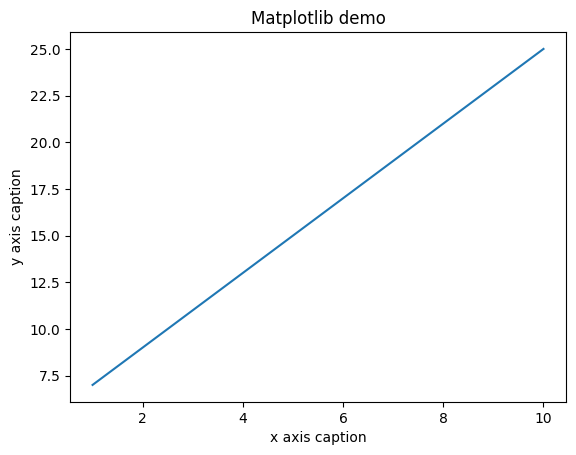

In [71]:
import numpy as np 
from matplotlib import pyplot as plt 

x_list = np.arange(-5, 5, 0.01)
y_list = np.arange(-1, 1, 0.01)
x, y = np.meshgrid(x_list, y_list)
z_2 = np.sinc((x/np.pi)**2+(y/np.pi)**2)

x = np.arange(1,11) 
y = 2 * x + 5 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()

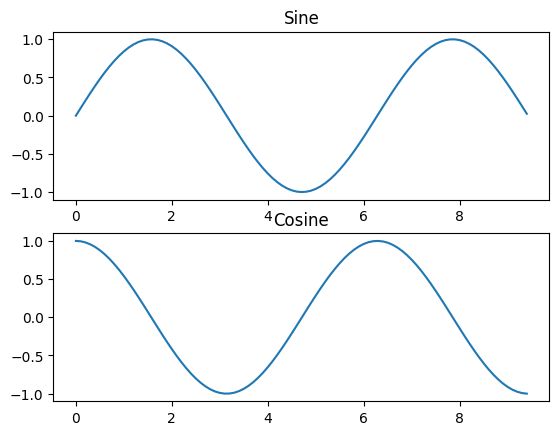

In [72]:
import numpy as np 
import matplotlib.pyplot as plt  
   
# Compute the x and y coordinates for points on sine and cosine curves 
x = np.arange(0, 3 * np.pi, 0.1) 
y_sin = np.sin(x) 
y_cos = np.cos(x)  
   
# Set up a subplot grid that has height 2 and width 1, 
# and set the first such subplot as active. 
plt.subplot(2, 1, 1)
   
# Make the first plot 
plt.plot(x, y_sin) 
plt.title('Sine')  
   
# Set the second subplot as active, and make the second plot. 
plt.subplot(2, 1, 2) 
plt.plot(x, y_cos) 
plt.title('Cosine')  
   
# Show the figure. 
plt.show()

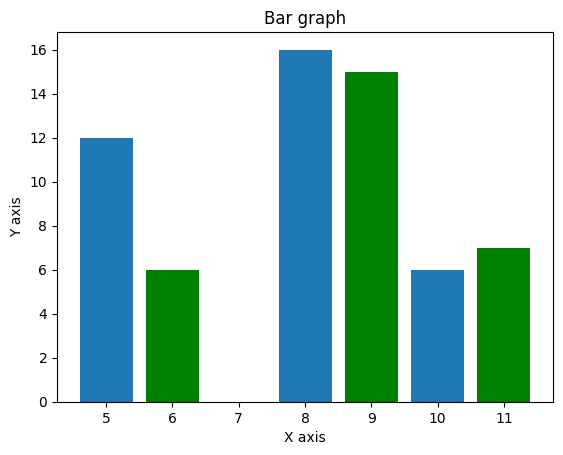

In [73]:
from matplotlib import pyplot as plt 
x = [5,8,10] 
y = [12,16,6]  

x2 = [6,9,11] 
y2 = [6,15,7] 
plt.bar(x, y, align = 'center') 
plt.bar(x2, y2, color = 'g', align = 'center') 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis')  

plt.show()

P = 1
V = 2
T = 3


TypeError: type.__new__() argument 2 must be tuple, not str

In [2]:
try:
    print(1/0)
except:
    print("error")
    exit(1)
else:
    print("el intento funcionó!")
    exit(0)

error


In [7]:
import random

for i in range(1000):
    print(random.uniform(0,100)) # no se incluyen los límites.

98.01039310343927
23.366150390617324
15.277089238146003
56.801707687975146
54.82784963017166
11.917353900378625
53.79598289590005
27.3558172410451
97.9118188273394
23.52280138852575
58.83543231435978
63.62788072397589
9.534567280853368
22.35491340846375
25.257846620728863
63.657904817593746
20.735391404017033
56.86800968719694
63.7978970213879
24.504480479615655
3.05492470244485
13.602889064150038
72.15046085958342
51.30969702633003
68.24268107158598
65.39152897016167
15.116960373786082
22.913883437539916
69.35117094870675
18.39415917959516
92.58092882852792
72.57032177373884
33.88319007848535
25.65176820898094
83.19493829053543
24.747403070865857
75.38064637487554
72.0953014481806
67.01803676953098
44.22301038208099
79.24794600869087
80.56479666051746
96.3204339633974
27.86356820235727
49.17960717575502
78.2567409345589
15.998278378732467
52.52918771901
29.834987474691122
13.162458737242655
4.473556894079566
40.762521575077905
42.13409670201721
50.1905310313696
29.11141793664345
93.83

In [23]:
dict={"P":1,"V":3,"T":'4'}
#dict={str(i):1 for i in range(10)}
dict2={**dict,'S':7}
print(dict2)
{**dict}

{'P': 1, 'V': 3, 'T': '4', 'S': 7}


{'P': 1, 'V': 3, 'T': '4'}

In [82]:
def f():
    return 1,2

print(type(f()))
(a,b)=1,2
print(a,b)
print(a)

<class 'tuple'>
1 2
1


In [88]:
dic={'1':2,'2':3}

for i in dic:
    print(i)

print(dic[0])

1
2


KeyError: 0

In [107]:
print("Más columnas que filas:")
print([[1,1,1,1],[1,1,1,1]])
print([[1,1,1,1],[1,1,1,1]]+[[0,0,0,0]]*2)
print("Más filas que columnas:")
print([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
print([[1,1,1,1]+[0,0],[1,1,1,1]+[0,0],[1,1,1,1]+[0,0],[1,1,1,1]+[0,0],[1,1,1,1]+[0,0],[1,1,1,1]+[0,0]])

Más columnas que filas:
[[1, 1, 1, 1], [1, 1, 1, 1]]
[[1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]]
Más filas que columnas:
[[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]
[[1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 0]]


In [118]:
[[1, 5], [2, 6], [3, 7]] + [[4, 8]]

[[1, 5], [2, 6], [3, 7], [4, 8]]

In [115]:
[]

[]

In [ ]:
def __add__(self,otra):
        '''map me permite iterar el lambda, y retorna un objeto de la clase map. Voy armando filas.'''
        return [list(map(lambda x,y:x+y,self.M[k],otra[k])) for k in range(self.shape[0])]
    
    